<a href="https://colab.research.google.com/github/jburchfield76/datasharing/blob/master/Ridge_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Generate synthetic data (or load real data)
np.random.seed(42)
data = pd.DataFrame({
    'age': np.random.randint(18, 70, 100),
    'salary': np.random.randint(30000, 120000, 100),
    'churn': np.random.choice([0, 1], 100)  # 0 = No churn, 1 = Churn
})

# Features and target
X = data[['age', 'salary']]
y = data['churn']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Ridge Logistic Regression (L2 Regularization)
ridge_model = LogisticRegression(penalty='l2', C=0.1)  # Smaller C = Stronger regularization

# Perform 10-fold cross-validation
ridge_scores = cross_val_score(ridge_model, X, y, cv=10)

# Print results
print("Ridge Regression (L2) Cross-validation scores:", ridge_scores)
print("Mean accuracy:", ridge_scores.mean())


Accuracy: 0.23333333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.15      0.33      0.21         9
           1       0.40      0.19      0.26        21

    accuracy                           0.23        30
   macro avg       0.28      0.26      0.23        30
weighted avg       0.33      0.23      0.24        30

Ridge Regression (L2) Cross-validation scores: [0.3 0.7 0.4 0.3 0.6 0.4 0.3 0.3 0.6 0.5]
Mean accuracy: 0.44000000000000006


In [2]:
# Standard Logistic Regression (No Regularization)
standard_model = LogisticRegression()  # Default is L2 with C=1
standard_scores = cross_val_score(standard_model, X, y, cv=10)

print("Standard Logistic Regression Mean Accuracy:", standard_scores.mean())
print("Ridge Logistic Regression Mean Accuracy:", ridge_scores.mean())


Standard Logistic Regression Mean Accuracy: 0.44000000000000006
Ridge Logistic Regression Mean Accuracy: 0.44000000000000006


In [3]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Different values of C to test
C_values = [0.01, 0.1, 1, 10, 100]
results = {}

# Loop over each C value
for C in C_values:
    model = LogisticRegression(penalty='l2', C=C)  # L2 regularization
    scores = cross_val_score(model, X, y, cv=10)  # 10-fold cross-validation
    results[C] = scores.mean()  # Store mean accuracy for each C

# Print results, if accuracy stable across values might need diff model/more features, not sensitive to regularization
for C, accuracy in results.items():    #if accuracy improves as c increases, we were over-regularizing
    print(f"C={C}: Mean Accuracy = {accuracy:.4f}") #if accuracy drops as c increases, reglrztion was preventing overfitting


C=0.01: Mean Accuracy = 0.4300
C=0.1: Mean Accuracy = 0.4400
C=1: Mean Accuracy = 0.4400
C=10: Mean Accuracy = 0.4400
C=100: Mean Accuracy = 0.4400


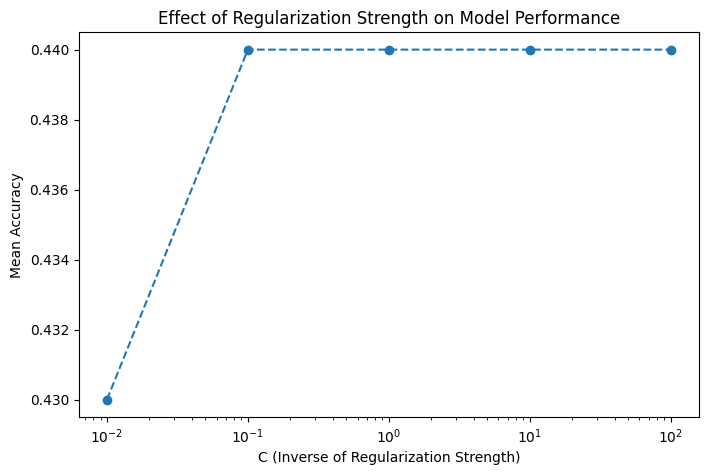

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(C_values, list(results.values()), marker='o', linestyle='--')
plt.xscale('log')  # Log scale for better visualization
plt.xlabel("C (Inverse of Regularization Strength)")
plt.ylabel("Mean Accuracy")
plt.title("Effect of Regularization Strength on Model Performance")
plt.show()
